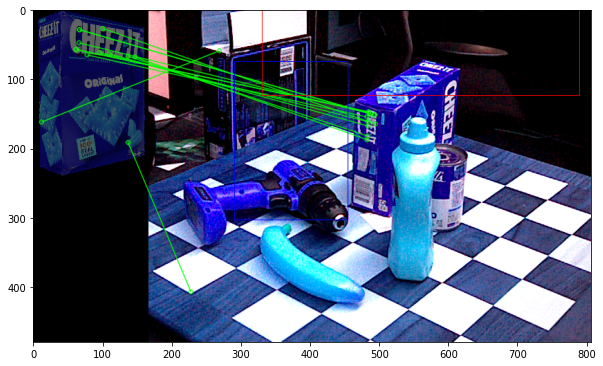

331 123 790 -335
284


In [116]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# https://stackoverflow.com/questions/51606215/how-to-draw-bounding-box-on-best-matches

# img1 = cv2.imread('/Users/william/Downloads/YCB/data/0015.png') 
# img2 = cv2.imread('/Users/william/Downloads/YCB/data/0048/000001-color.png')
img1 = cv2.imread('/Users/william/Downloads/YCB/data/0005.png') 
img2 = cv2.imread('/Users/william/Downloads/YCB/data/0050/000254-color.png')

# Initiate SIFT detector
orb = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

good_matches = matches[:50]

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h, w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

dst = cv2.perspectiveTransform(pts, M)
# dst += (w, 0)  # adding offset

draw_params = dict(matchColor = (0, 255, 0), # draw matches in green color
               singlePointColor = None,
               matchesMask = matchesMask, # draw only inliers
               flags=2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

# Draw bounding box in red
# img3 = cv2.polylines(img3, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)
dst = dst.squeeze()
x_min = int(min(dst[0][0], dst[1][0]))
x_max = int(max(dst[2][0], dst[3][0]))
y_min = int(min(dst[0][1], dst[1][1]))
y_max = int(max(dst[2][1], dst[2][1]))
img3 = cv2.rectangle(img3, (x_min, y_min), (x_max, y_max), (255, 0, 0))

# Draw ground truth bounding box in blue
img3 = cv2.rectangle(img3, (291, 74), (455, 303), (0, 0, 255))

plt.figure(figsize=(10,10))
plt.imshow(img3), plt.show()

print(x_min, y_min, x_max, y_max)
print(117+w)

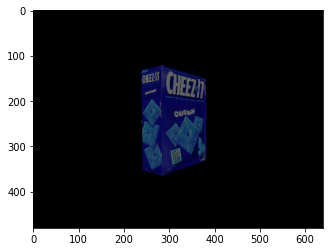

In [113]:
image = cv2.imread('/Users/william/Downloads/YCB/target/003_cracker_box/0004.png') 
plt.imshow(image)

def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

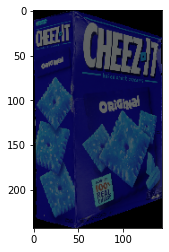

In [114]:
plt.imshow(crop(image))